# Exemplar: Evaluate simple linear regression

## Introduction

Here We will employ a simple linear regression to explore the relationship between two continuous variables. To accomplish this, we will perform a complete simple linear regression analysis, which includes creating and fitting a model, checking model assumptions, analyzing model performance, interpreting model coefficients, and communicating results to stakeholders.

#### **References**

Saragih, H.S. (2020). [*Dummy Marketing and Sales Data*](https://www.kaggle.com/datasets/harrimansaragih/dummy-advertising-and-sales-data).


## Step 1: Imports

In [1]:
# Import pandas, pyplot from matplotlib, and seaborn.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import the statsmodel module.
import statsmodels.api as sm
# Import the ols function from statsmodels.
from statsmodels.formula.api import ols

In [3]:
# Load the data.

data = pd.read_csv('modified_marketing_and_sales_data.csv')

data.head()

,TV,Radio,Social_Media,Sales
0,16.0,6.566231,2.907983,54.732757
1,13.0,9.237765,2.409567,46.677897
2,41.0,15.886446,2.913410,150.177829
3,83.0,30.020028,6.922304,298.246340
4,15.0,8.437408,1.405998,56.594181


## Step 2: Data exploration

### Familiarize yourself with the data's features

The features in the data are:
* TV promotion budget (in millions of dollars)
* Social media promotion budget (in millions of dollars)
* Radio promotion budget (in millions of dollars)
* Sales (in millions of dollars)

### Explore the data size

In [4]:
# Display the shape 
data.shape

(4572, 4)

### Explore the independent variables

In [5]:
# Generate descriptive statistics about TV, Radio, and Social_Media.

data[['TV','Radio','Social_Media']].describe()

,TV,Radio,Social_Media
count,4562.000000,4568.000000,4566.000000
mean,54.066857,18.160356,3.323956
std,26.125054,9.676958,2.212670
min,10.000000,0.000684,0.000031
25%,32.000000,10.525957,1.527849
50%,53.000000,17.859513,3.055565
75%,77.000000,25.649730,4.807558
max,100.000000,48.871161,13.981662


### Explore the dependent variable

In [6]:
# Calculate the average missing rate in the sales column.
missing_sales = data.Sales.isna().mean()

# Convert the missing_sales from a decimal to a percentage and round to 2 decimal places.
missing_sales = round(missing_sales*100, 2)

# Display the results (missing_sales must be converted to a string to be concatenated in the print statement).
print('Percentage of promotions missing Sales: ' +  str(missing_sales) + '%')

Percentage of promotions missing Sales: 0.13%


The preceding output shows that 0.13% of rows are missing the `Sales` value.

### Remove the missing data

In [7]:
# Subset the data to include rows where Sales is present.

data = data.dropna(subset = ['Sales'], axis = 0)

### Visualize the sales distribution

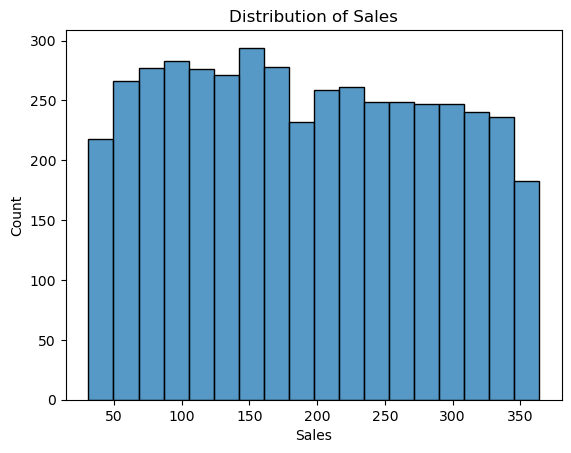

In [9]:
# Create a histogram of the Sales.

fig = sns.histplot(data['Sales'])
fig.set_title('Distribution of Sales');

Generally, `Sales` are equally distributed between 25 and 350 million. 

## Step 3: Model building

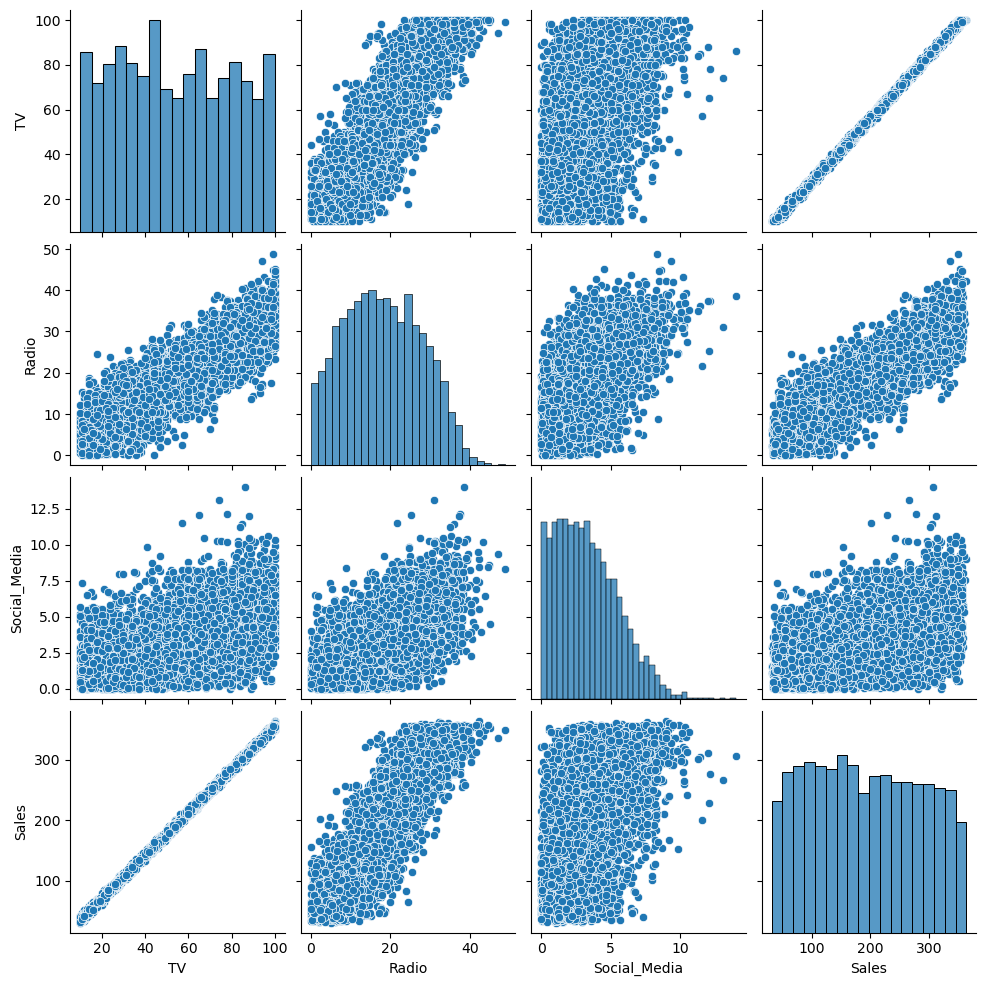

In [11]:
# Create a pairplot of the data.

sns.pairplot(data);

`TV` clearly has the strongest linear relationship with `Sales`. You could draw a straight line through the scatterplot of `TV` and `Sales` that confidently estimates `Sales` using `TV`. `Radio` and `Sales` appear to have a linear relationship, but there is larger variance than between `TV` and `Sales`.

### Build and fit the model

In [12]:

# Define the OLS formula.
ols_formula = 'Sales ~ TV'

# Create an OLS model.
OLS = ols(formula = ols_formula, data = data)

# Fit the model.
model = OLS.fit()

# Save the results summary.
model_results = model.summary()

model_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 4.527e+06
Date:                Thu, 05 Oct 2023   Prob (F-statistic):               0.00
Time:                        12:04:36   Log-Likelihood:                -11393.
No. Observations:                4556   AIC:                         2.279e+04
Df Residuals:                    4554   BIC:                         2.280e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1263      0.101     -1.257      0.209      -0.323       0.071
TV             3.5614      0.002   2127.776      0.000       3.558       3.565
==============================================================================
Omnibus:                        0.051   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.975   Jarque-Bera (JB):                0.030
Skew:                           0.001   Prob(JB):                        0.985
Kurtosis:                       3.012   Cond. No.                         138.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Check model assumptions

To justify using simple linear regression, check that the four linear regression assumptions are not violated. These assumptions are:

* Linearity
* Independent Observations
* Normality
* Homoscedasticity

### Model assumption: Linearity

The linearity assumption requires a linear relationship between the independent and dependent variables. Check this assumption by creating a scatterplot comparing the independent variable with the dependent variable. 

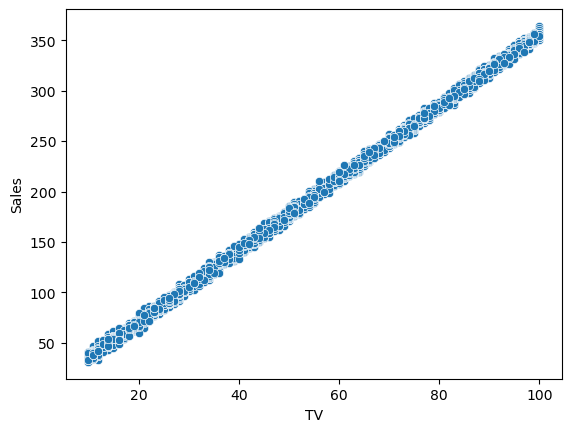

In [13]:
# Create a scatterplot comparing X and Sales (Y).

sns.scatterplot(x = data['TV'], y = data['Sales']);

There is a clear linear relationship between `TV` and `Sales`, meeting the linearity assumption.

### Model assumption: Independence

The **independent observation assumption** states that each observation in the dataset is independent. As each marketing promotion is independent from one another, the independence assumption is not violated.

### Model assumption: Normality

The **normality assumption** states that the errors are normally distributed.

Create two plots to check this assumption:

* **Plot 1**: Histogram of the residuals
* **Plot 2**: Q-Q plot of the residuals

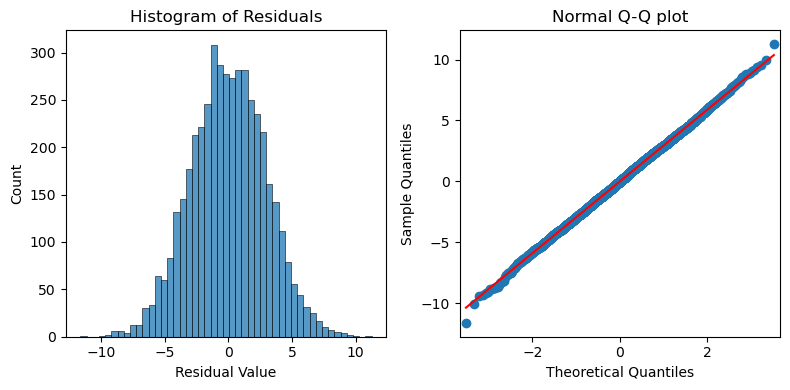

In [14]:
# Calculate the residuals.

residuals = model.resid
fig, axes = plt.subplots(1, 2, figsize = (8,4))
sns.histplot(residuals, ax=axes[0])
axes[0].set_xlabel("Residual Value")
axes[0].set_title("Histogram of Residuals")
sm.qqplot(residuals, line='s',ax = axes[1])
axes[1].set_title("Normal Q-Q plot")
plt.tight_layout()
plt.show()

The histogram of the residuals are approximately normally distributed, which supports that the normality assumption is met for this model.The residuals in the Q-Q plot form a straight line, further supporting that the normality assumption is met.

### Model assumption: Homoscedasticity

The **homoscedasticity (constant variance) assumption** is that the residuals have a constant variance for all values of `X`.

Check that this assumption is not violated by creating a scatterplot with the fitted values and residuals. $y = 0$ to visualize the variance of residuals above and below $y = 0$.

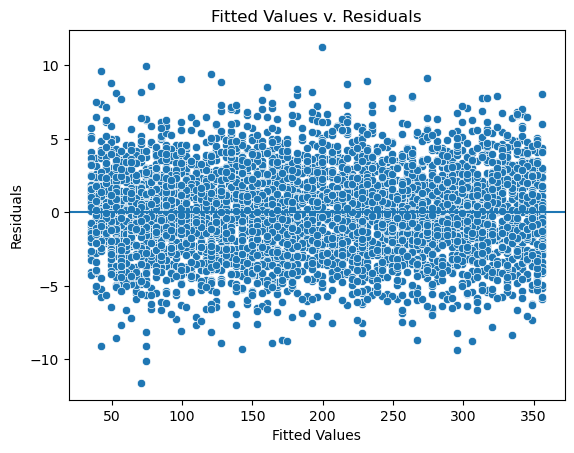

In [15]:
# Create a scatterplot with the fitted values from the model and the residuals.
fig = sns.scatterplot(x = model.fittedvalues, y = model.resid)
fig.set_xlabel("Fitted Values")
fig.set_ylabel("Residuals")
fig.set_title("Fitted Values v. Residuals")
fig.axhline(0)
plt.show()

The variance of the residuals is consistant across all $X$. Thus, the assumption of homoscedasticity is met.

## Step 4: Results and evaluation

In [14]:
# Display the model_results defined previously.

model_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 4.527e+06
Date:                Wed, 28 Jun 2023   Prob (F-statistic):               0.00
Time:                        23:51:28   Log-Likelihood:                -11393.
No. Observations:                4556   AIC:                         2.279e+04
Df Residuals:                    4554   BIC:                         2.280e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1263      0.101     -1.257      0.209      -0.323       0.071
TV             3.5614      0.002   2127.776      0.000       3.558       3.565
==============================================================================
Omnibus:                        0.051   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.975   Jarque-Bera (JB):                0.030
Skew:                           0.001   Prob(JB):                        0.985
Kurtosis:                       3.012   Cond. No.                         138.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Using `TV` as X results in a simple linear regression model with $R^{2} = 0.999$. In other words, `TV` explains $99.9\%$ of the variation in `Sales`.

The R-squared value will depend on the variable selected for X. 


### Interpret the model results

When `TV` is used as the independent variable X, the linear equation is:

$Y = \text{Intercept} + \text{Slope} * X$

$\text{Sales (in millions)} = \text{Intercept} + \text{Slope} *\text{TV (in millions)}$

$\text{Sales (in millions)} = -0.1263 + 3.5614 * \text{TV (in millions)}$

According to the model, when `TV` is used as the independent variable X, an increase of one million dollars for the TV promotional budget results in an estimated 3.5614 million dollars more in sales.

Beta coefficients allow you to estimate the magnitude and direction (positive or negative) of the effect of each independent variable on the dependent variable. The coefficient estimates can be converted to explainable insights, such as the connection between an increase in TV promotional budgets and sales mentioned previously.

### Measure the uncertainty of the coefficient estimates

When `TV` is used as the independent variable, it has a p-value of $0.000$ and a $95\%$ confidence interval of $[3.558,3.565]$. This means there is a $95\%$ chance the interval $[3.558,3.565]$ contains the true parameter value of the slope. These results indicate little uncertainty in the estimation of the slope of X. Therefore, the business can be confident in the impact `TV` has on `Sales`.

Of the three available promotion types (TV, radio, and social media), TV has the strongest positive linear relationship with sales. According to the model, an increase of one million dollars for the TV promotional budget will result in an estimated 3.5614 million dollars more in sales. This is a very confident estimate, as the p-value for this coefficient estimate is small. Thus, the business should prioritize increasing the TV promotional budget over the radio and social media promotional budgets to increase sales. 

## Considerations


**How would you frame your findings to stakeholders?**

* Among TV, social media, and radio, TV had the strongest positive linear relationship with sales. 
* The linear regression model estimates that 99.9% of the variation in sales is explained by the TV promotional budget. In other words, nearly all of the variation in sales can be explained by the TV promotional budget alone, making TV an excellent predictor of sales.
* According to the model, when TV is used as the independent variable X, an increase of one million dollars for the TV promotional budget would result in an estimated 3.5614 million more dollars in sales. 
* The interval (3.558 million, 3.565 million) has a 95% probability of containing the true estimate of the increase in sales for a one million dollar increase in the TV promotional budget. Therefore, the estimate provided in the previous bullet is very confident.

# Hypothesis testing with Python

One-way ANOVA test will determine if there is a statistically significant difference in sales among groups. This includes:
* Using plots and descriptive statistics to select a categorical independent variable
* Creating and fitting a linear regression model with the selected categorical independent variable
* Checking model assumptions
* Performing and interpreting a one-way ANOVA test
* Comparing pairs of groups using an ANOVA post hoc test
* Interpreting model outputs and communicating the results to nontechnical stakeholders

In [23]:
# Import libraries and packages.
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [24]:
# Load the data.
data = pd.read_csv('marketing_sales_data.csv')
data.head()

,TV,Radio,Social Media,Influencer,Sales
0,Low,1.218354,1.270444,Micro,90.054222
1,Medium,14.949791,0.274451,Macro,222.741668
2,Low,10.377258,0.061984,Mega,102.774790
3,High,26.469274,7.070945,Micro,328.239378
4,High,36.876302,7.618605,Mega,351.807328


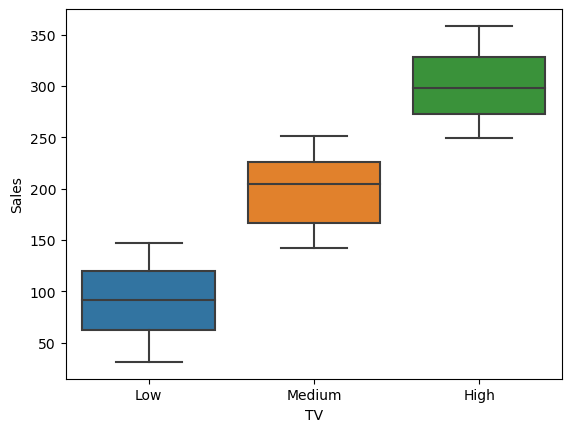

In [25]:
# Create a boxplot with TV and Sales.
sns.boxplot(x = "TV", y = "Sales", data = data);

There is considerable variation in `Sales` across the `TV` groups. The significance of these differences can be tested with a one-way ANOVA.

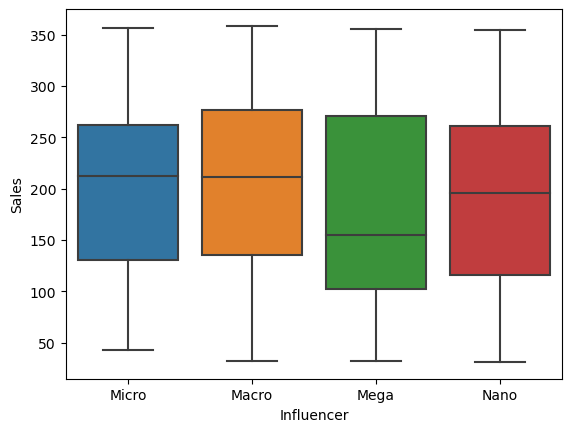

In [26]:
# Create a boxplot with Influencer and Sales.
sns.boxplot(x = "Influencer", y = "Sales", data = data);

There is some variation in `Sales` across the `Influencer` groups, but it may not be significant.

### Remove missing data

In [27]:
# Drop rows that contain missing data and update the DataFrame.
data = data.dropna(axis=0)
data.isnull().sum(axis=0)

TV              0
Radio           0
Social Media    0
Influencer      0
Sales           0
dtype: int64

In [28]:
# Define the OLS formula.
ols_formula = 'Sales ~ C(TV)'
OLS = ols(formula = ols_formula, data = data)
model = OLS.fit()
model_results = model.summary()
model_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     1971.
Date:                Thu, 05 Oct 2023   Prob (F-statistic):          8.81e-256
Time:                        12:19:34   Log-Likelihood:                -2778.9
No. Observations:                 569   AIC:                             5564.
Df Residuals:                     566   BIC:                             5577.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         300.5296      2.417    124.360      0.000     295.783     305.276
C(TV)[T.Low]     -208.8133      3.329    -62.720      0.000    -215.353    -202.274
C(TV)[T.Medium]  -101.5061      3.325    -30.526      0.000    -108.038     -94.975
==============================================================================
Omnibus:                      450.714   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.763
Skew:                          -0.044   Prob(JB):                     1.71e-08
Kurtosis:                       1.775   Cond. No.                         3.86
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* `TV` was selected as the preceding analysis showed a strong relationship between the `TV` promotion budget and the average `Sales`.
* `Influencer` was not selected because it did not show a strong relationship to `Sales` in the analysis.

### Check model assumptions

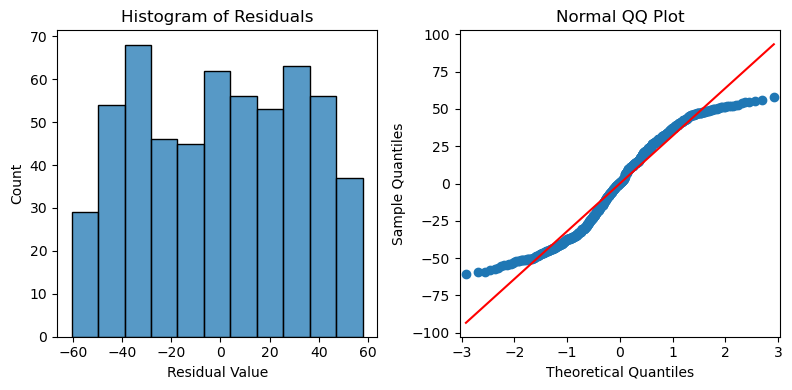

In [29]:
# Calculate the residuals.
residuals = model.resid
fig, axes = plt.subplots(1, 2, figsize = (8,4))
sns.histplot(residuals, ax=axes[0])
axes[0].set_xlabel("Residual Value")
axes[0].set_title("Histogram of Residuals")
sm.qqplot(residuals, line='s',ax = axes[1])
axes[1].set_title("Normal QQ Plot")
plt.tight_layout()
plt.show()

There is reasonable concern that the normality assumption is not met when `TV` is used as the independent variable predicting `Sales`. The normal q-q forms an 'S' that deviates off the red diagonal line, which is not desired behavior. 

However, for the purpose of the lab, continue assuming the normality assumption is met.

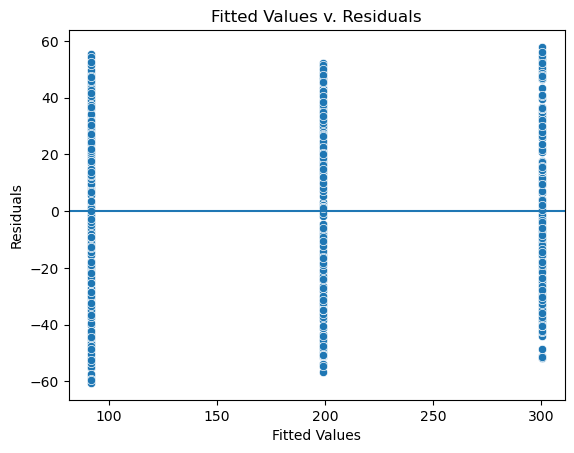

In [30]:
# Create a scatter plot with the fitted values from the model and the residuals.
fig = sns.scatterplot(x = model.fittedvalues, y = model.resid)
fig.set_xlabel("Fitted Values")
fig.set_ylabel("Residuals")
fig.set_title("Fitted Values v. Residuals")
fig.axhline(0)
plt.show()

The variance where there are fitted values is similarly distributed, validating that the constant variance assumption is met.

## **Results and evaluation** 

In [31]:
# Display the model results summary.
model_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     1971.
Date:                Thu, 05 Oct 2023   Prob (F-statistic):          8.81e-256
Time:                        12:19:34   Log-Likelihood:                -2778.9
No. Observations:                 569   AIC:                             5564.
Df Residuals:                     566   BIC:                             5577.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         300.5296      2.417    124.360      0.000     295.783     305.276
C(TV)[T.Low]     -208.8133      3.329    -62.720      0.000    -215.353    -202.274
C(TV)[T.Medium]  -101.5061      3.325    -30.526      0.000    -108.038     -94.975
==============================================================================
Omnibus:                      450.714   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.763
Skew:                          -0.044   Prob(JB):                     1.71e-08
Kurtosis:                       1.775   Cond. No.                         3.86
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Using `TV` as the independent variable results in a linear regression model with $R^{2} = 0.874$. In other words, the model explains $87.4\%$ of the variation in `Sales`. This makes the model an effective predictor of `Sales`. 

The default `TV` category for the model is `High`, because there are coefficients for the other two `TV` categories, `Medium` and `Low`. According to the model, `Sales` with a `Medium` or `Low` `TV` category are lower on average than `Sales` with a `High` `TV` category. For example, the model predicts that a `Low` `TV` promotion would be 208.813 (in millions of dollars) lower in `Sales` on average than a `High` `TV` promotion.

The p-value for all coefficients is $0.000$, meaning all coefficients are statistically significant at $p=0.05$. The 95% confidence intervals for each coefficient should be reported when presenting results to stakeholders. For instance, there is a $95\%$ chance the interval $[-215.353,-202.274]$ contains the true parameter of the slope of $\beta_{TVLow}$, which is the estimated difference in promotion sales when a `Low` `TV` promotion is chosen instead of a `High` `TV` promotion.

Given how accurate `TV` was as a predictor, the model could be improved with a more granular view of the `TV` promotions, such as additional categories or the actual `TV` promotion budgets. Further, additional variables, such as the location of the marketing campaign or the time of year, may increase model accuracy. 

### Perform a one-way ANOVA test

In [32]:
# Create an one-way ANOVA table for the fit model.
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(TV),4.052692e+06,2.0,1971.455737,8.805550e-256
Residual,5.817589e+05,566.0,NaN,NaN


The null hypothesis is that there is no difference in `Sales` based on the `TV` promotion budget.

The alternative hypothesis is that there is a difference in `Sales` based on the `TV` promotion budget.

The F-test statistic is 1971.46 and the p-value is $8.81 * 10^{-256}$ (i.e., very small). Because the p-value is less than 0.05, you would reject the null hypothesis that there is no difference in `Sales` based on the `TV` promotion budget.

The results of the one-way ANOVA test indicate that you can reject the null hypothesis in favor of the alternative hypothesis. There is a statistically significant difference in `Sales` among `TV` groups.

### Perform an ANOVA post hoc test

In [33]:
# Perform the Tukey's HSD post hoc test.
tukey_oneway = pairwise_tukeyhsd(endog = data["Sales"], groups = data["TV"])
tukey_oneway.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
High,Low,-208.8133,0.0,-216.6367,-200.9898,True
High,Medium,-101.5061,0.0,-109.3202,-93.6921,True
Low,Medium,107.3072,0.0,99.7066,114.9077,True


The first row, which compares the `High` and `Low` `TV` groups, indicates that you can reject the null hypothesis that there is no significant difference between the `Sales` of these two groups.

You can also reject the null hypotheses for the two other pairwise comparisons that compare `High` to `Medium` and `Low` to `Medium`.

A post hoc test was conducted to determine which `TV` groups are different and how many are different from each other. This provides more detail than the one-way ANOVA results, which can at most determine that at least one group is different. Further, using the Tukey HSD controls for the increasing probability of incorrectly rejecting a null hypothesis from peforming multiple tests. 

The results were that `Sales` is not the same between any pair of `TV` groups. 

## **Considerations**

**What are some key takeaways that you learned during this lab?**

* Box-plots are a helpful tool for visualizing the distribution of a variable across groups.
* One-way ANOVA can be used to determine if there are significant differences among the means of three or more groups.
* ANOVA post hoc tests provide a more detailed view of the pairwise differences between groups.

**What summary would you provide to stakeholders? Consider the statistical significance of key relationships and differences in distribution.**

High TV promotion budgets result in significantly more sales than both medium and low TV promotion budgets. Medium TV promotion budgets result in significantly more sales than low TV promotion budgets.


# Perform multiple linear regression


## Introduction

In [34]:
# Load the data.
df = pd.read_csv('marketing_sales_data.csv')
df.head()

,TV,Radio,Social Media,Influencer,Sales
0,Low,1.218354,1.270444,Micro,90.054222
1,Medium,14.949791,0.274451,Macro,222.741668
2,Low,10.377258,0.061984,Mega,102.774790
3,High,26.469274,7.070945,Micro,328.239378
4,High,36.876302,7.618605,Mega,351.807328


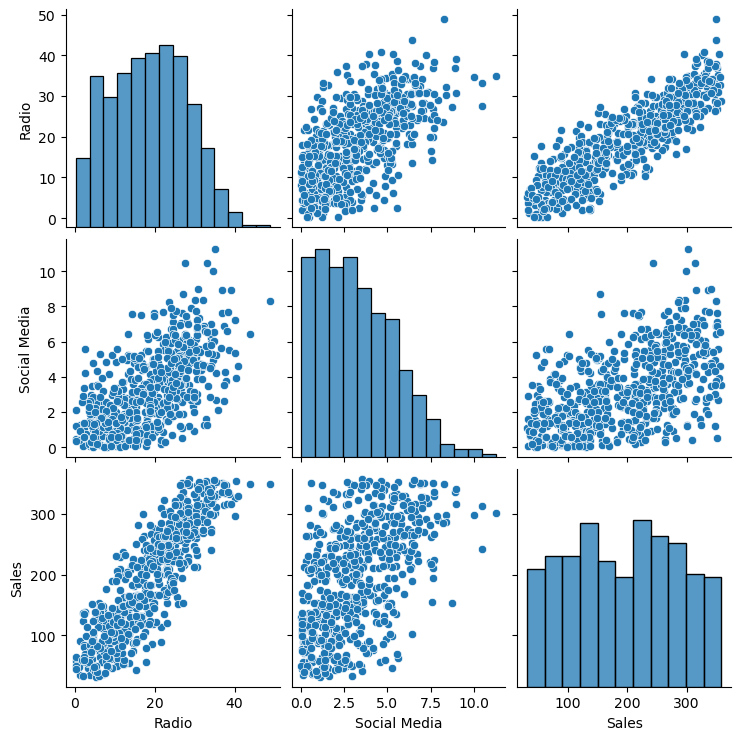

In [35]:
# Create a pairplot of the data.
sns.pairplot(df);

`Radio` and `Social Media` both appear to have linear relationships with `Sales`. Given this, `Radio` and `Social Media` may be useful as independent variables in a multiple linear regression model estimating `Sales`. 

`TV` and `Influencer` are excluded from the pairplot because they are not numeric. 

In [36]:
# Calculate the mean sales for each TV category. 
print(df.groupby('TV')['Sales'].mean()) 

print(df.groupby('Influencer')['Sales'].mean())

TV
High      300.529591
Low        91.646843
Medium    199.023461
Name: Sales, dtype: float64
Influencer
Macro    205.660047
Mega     180.385096
Micro    198.655080
Nano     190.777766
Name: Sales, dtype: float64


The average `Sales` for `High` `TV` promotions is considerably higher than for `Medium` and `Low` `TV` promotions. `TV` may be a strong predictor of `Sales`.

The categories for `Influencer` have different average `Sales`, but the variation is not substantial. `Influencer` may be a weak predictor of `Sales`.

These results can be investigated further when fitting the multiple linear regression model. 

In [37]:
# Drop rows that contain missing data and update the DataFrame.
df = df.dropna(axis=0)

In [38]:
# Rename all columns in data that contain a space. 
df = df.rename(columns={'Social Media': 'Social_Media'})

In [39]:
# Define the OLS formula.
ols_formula = 'Sales ~ C(TV) + Radio'
OLS = ols(formula = ols_formula, data = df)
model = OLS.fit()
model_results = model.summary()
model_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     1782.
Date:                Thu, 05 Oct 2023   Prob (F-statistic):          1.61e-287
Time:                        12:27:03   Log-Likelihood:                -2701.4
No. Observations:                 569   AIC:                             5411.
Df Residuals:                     565   BIC:                             5428.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         217.6367      6.577     33.089      0.000     204.718     230.556
C(TV)[T.Low]     -152.0897      5.160    -29.474      0.000    -162.225    -141.954
C(TV)[T.Medium]   -73.4835      3.587    -20.484      0.000     -80.530     -66.437
Radio               2.8864      0.217     13.306      0.000       2.460       3.312
==============================================================================
Omnibus:                       35.219   Durbin-Watson:                   1.949
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               13.863
Skew:                           0.087   Prob(JB):                     0.000976
Kurtosis:                       2.255   Cond. No.                         155.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Which independent variables did you choose for the model, and why?

* `TV` was selected, as the preceding analysis showed a strong relationship between the `TV` promotional budget and the average `Sales`.
* `Radio` was selected because the pairplot showed a strong linear relationship between `Radio` and `Sales`.
* `Social Media` was not selected because it did not increase model performance and it was later determined to be correlated with another independent variable: `Radio`.
* `Influencer` was not selected because it did not show a strong relationship to `Sales` in the preceding analysis.

### Check model assumptions

### Model assumption: Linearity

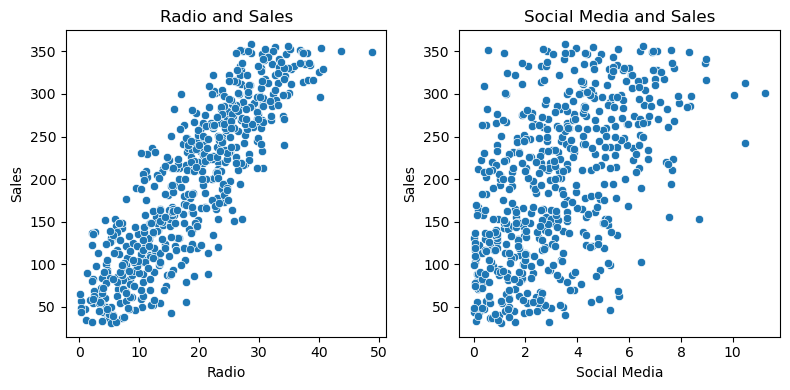

In [40]:
# Create a scatterplot for each independent variable and the dependent variable.
fig, axes = plt.subplots(1, 2, figsize = (8,4))
sns.scatterplot(x = df['Radio'], y = df['Sales'],ax=axes[0])
axes[0].set_title("Radio and Sales")
sns.scatterplot(x = df['Social_Media'], y = df['Sales'],ax=axes[1])
axes[1].set_title("Social Media and Sales")
axes[1].set_xlabel("Social Media")
plt.tight_layout()


The linearity assumption holds for `Radio`, as there is a clear linear relationship in the scatterplot between `Radio` and `Sales`. `Social Media` was not included in the preceding multiple linear regression model, but it does appear to have a linear relationship with `Sales`.

### Model assumption: Independence

The independence assumption is not violated.

### Model assumption: Normality

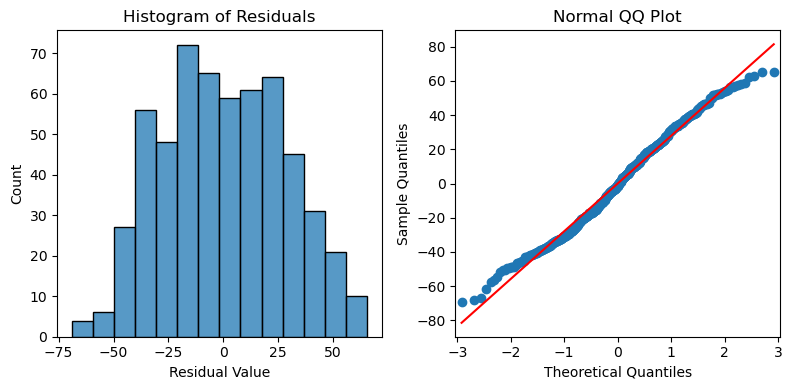

In [42]:
# Calculate the residuals.
residuals = model.resid
fig, axes = plt.subplots(1, 2, figsize = (8,4))
sns.histplot(residuals, ax=axes[0])
axes[0].set_xlabel("Residual Value")
axes[0].set_title("Histogram of Residuals")
sm.qqplot(residuals, line='s',ax = axes[1])
axes[1].set_title("Normal QQ Plot")
plt.tight_layout()
plt.show()

The histogram of the residuals are approximately normally distributed, which supports that the normality assumption is met for this model. The residuals in the Q-Q plot form a straight line, further supporting that this assumption is met.

### Model assumption: Constant variance

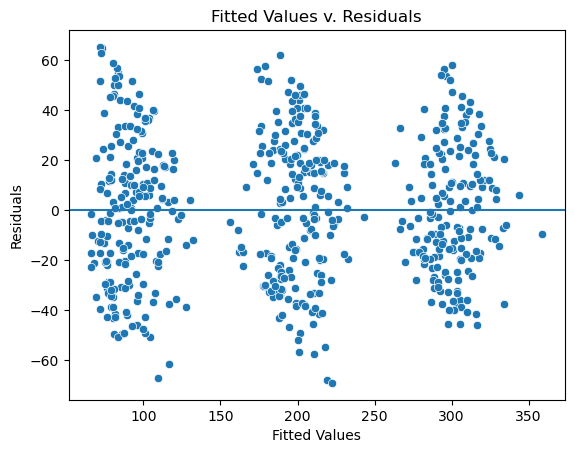

In [43]:
# Create a scatterplot with the fitted values from the model and the residuals.
fig = sns.scatterplot(x = model.fittedvalues, y = model.resid)
fig.set_xlabel("Fitted Values")
fig.set_ylabel("Residuals")
fig.set_title("Fitted Values v. Residuals")
fig.axhline(0)
plt.show()

The fitted values are in three groups because the categorical variable is dominating in this model, meaning that TV is the biggest factor that decides the sales.

However, the variance where there are fitted values is similarly distributed, validating that the assumption is met.


### Model assumption: No multicollinearity

The **no multicollinearity assumption** states that no two independent variables ($X_i$ and $X_j$) can be highly correlated with each other. 

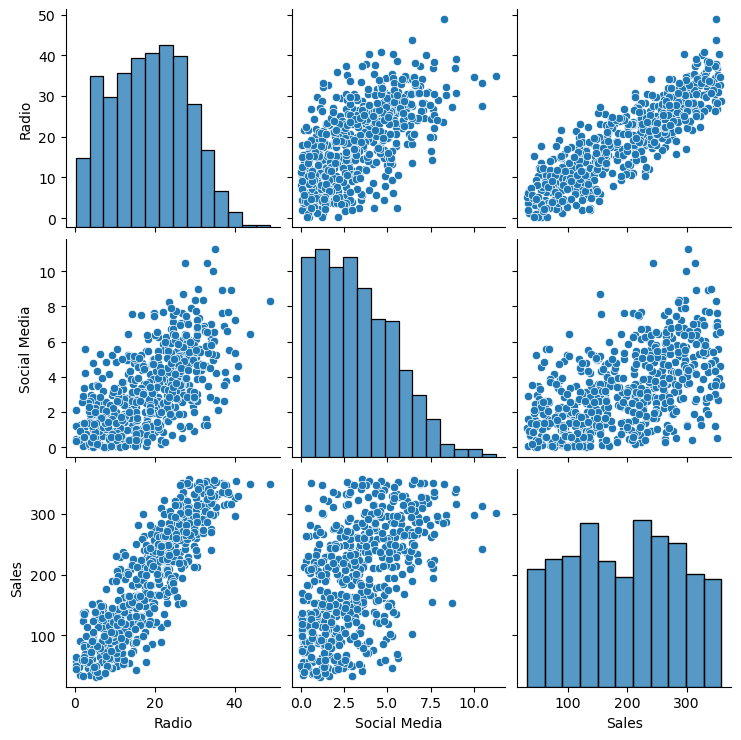

In [44]:
# Create a pairplot of the data.
sns.pairplot(data)

In [46]:
# Calculate the variance inflation factor (optional).
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = df[['Radio','Social_Media']]
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
df_vif = pd.DataFrame(vif, index=X.columns, columns = ['VIF'])
df_vif

,VIF
Radio,4.93238
Social_Media,4.93238


The preceding model only has one continous independent variable, meaning there are no multicollinearity issues. 

If a model used both `Radio` and `Social_Media` as predictors, there would be a moderate linear relationship between `Radio` and `Social_Media` that violates the multicollinearity assumption. Furthermore, the variance inflation factor when both `Radio` and `Social_Media` are included in the model is 5.17 for each variable, indicating high multicollinearity.

## Results and evaluation

In [47]:
# Display the model results summary.
model_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     1782.
Date:                Thu, 05 Oct 2023   Prob (F-statistic):          1.61e-287
Time:                        12:27:03   Log-Likelihood:                -2701.4
No. Observations:                 569   AIC:                             5411.
Df Residuals:                     565   BIC:                             5428.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         217.6367      6.577     33.089      0.000     204.718     230.556
C(TV)[T.Low]     -152.0897      5.160    -29.474      0.000    -162.225    -141.954
C(TV)[T.Medium]   -73.4835      3.587    -20.484      0.000     -80.530     -66.437
Radio               2.8864      0.217     13.306      0.000       2.460       3.312
==============================================================================
Omnibus:                       35.219   Durbin-Watson:                   1.949
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               13.863
Skew:                           0.087   Prob(JB):                     0.000976
Kurtosis:                       2.255   Cond. No.                         155.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Using `TV` and `Radio` as the independent variables results in a multiple linear regression model with $R^{2} = 0.904$. In other words, the model explains $90.4\%$ of the variation in `Sales`. This makes the model an excellent predictor of `Sales`. 

### Interpret model coefficients

**Question:** What are the model coefficients?

When `TV` and `Radio` are used to predict `Sales`, the model coefficients are:

* $\beta_{0} =  217.6367 $
* $\beta_{TVLow}= -152.0897 $
* $\beta_{TVMedium} = -73.4835$
* $\beta_{Radio} =  2.8864$

Beta coefficients allow you to estimate the magnitude and direction (positive or negative) of the effect of each independent variable on the dependent variable. The coefficient estimates can be converted to explainable insights, such as the connection between an increase in TV promotional budgets and sales mentioned previously.

## Considerations

** key takeaways**

* Multiple linear regression is a powerful tool to estimate a dependent continous variable from several independent variables.
* Exploratory data analysis is useful for selecting both numeric and categorical features for multiple linear regression.
* Fitting multiple linear regression models may require trial and error to select variables that fit an accurate model while maintaining model assumptions.


**How would you frame your findings to stakeholders?**

High TV promotional budgets have a substantial positive influence on sales. The model estimates that switching from a high to medium TV promotional budget reduces sales by $\$75.3120$ million (95% CI $[-82.431,-68.193])$, and switching from a high to low TV promotional budget reduces sales by $\$154.297$ million (95% CI $[-163.979,-144.616])$. The model also estimates that an increase of $\$1$ million in the radio promotional budget will yield a $\$2.9669$ million increase in sales (95% CI $[2.551,3.383]$).

